In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("50_Startups.csv")


In [3]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


In [5]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [6]:
independent = dataset[['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida', 'State_New York']]
dependent = dataset[['Profit']]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.30, random_state=0)

In [8]:
from sklearn.tree import DecisionTreeRegressor

# squared_error
regressor = DecisionTreeRegressor(criterion='squared_error', max_features='sqrt')
regressor = regressor.fit(X_train, y_train)


In [15]:
# friedman_mse
regressor = DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt')
regressor = regressor.fit(X_train, y_train)

In [19]:
# absolute_error
regressor = DecisionTreeRegressor(criterion='absolute_error', max_features='sqrt')
regressor = regressor.fit(X_train, y_train)

In [23]:
# poisson
regressor = DecisionTreeRegressor(criterion='poisson', max_features='sqrt')
regressor = regressor.fit(X_train, y_train)

In [9]:
import matplotlib

print(matplotlib.__version__)

3.9.2


In [10]:
import matplotlib.pyplot as plt


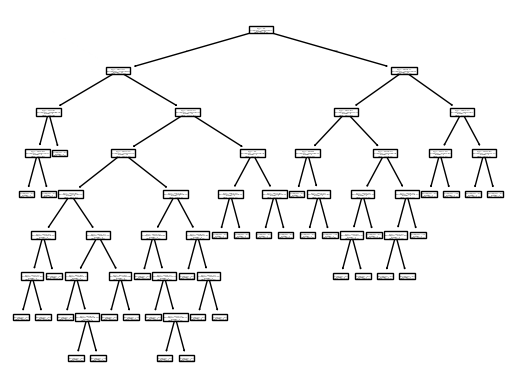

In [11]:
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [24]:
y_pred = regressor.predict(X_test)

In [25]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)


In [ ]:
r2_score

# For Squared error, max_feature sqrt Predict value is : -1.9862728177921158

# For Freied man, max_feature sqrt Predict value is: 0.4411282246167879

# absolute_error, max_feature sqrt Predict value is: 0.8093319243748771

# poisson max_feature sqrt Predict value is: 0.8969670980842467

0.8969670980842467